In [ ]:
!pip install ecl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install dtaidistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ecl.summary import EclSum
import pandas as pd
import numpy as np
import os
from dtaidistance import dtw
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import os
from os import listdir
import mmap
import shutil
import plotly as py
#import chart_studio
#chart_studio.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')
import colorlover as cl
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
names = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Бинарный классификатор/names.csv')
names

,0
0,BIG_MODEL_12_09_306
1,BIG_MODEL_12_09_307
2,BIG_MODEL_12_09_308
3,BIG_MODEL_12_09_309
4,BIG_MODEL_12_09_310
...,...
395,BIG_MODEL_12_09_702
396,BIG_MODEL_12_09_703
397,BIG_MODEL_12_09_704
398,BIG_MODEL_12_09_705


In [ ]:
#Создаем список, извлекаем из PRT-файла нужные нам данные

flpt = []
time = []
fopt = []
fopth = []
flpth = []
for i in range (names.shape[0]):    
    summary = EclSum.load('/content/drive/MyDrive/Colab Notebooks/Бинарный классификатор/prts/'  + names.loc[i].values[0] +'.SMSPEC',
                          '/content/drive/MyDrive/Colab Notebooks/Бинарный классификатор/prts/'   + names.loc[i].values[0] +'.UNSMRY')
    
    summary.time_range(interval='1M')
    FLPT =summary.numpy_vector('FLPT')
    FLPTH =summary.numpy_vector('FLPTH')
    TIME =summary.numpy_vector('YEARS')
    FOPT = summary.numpy_vector('FOPT')
    FOPTH = summary.numpy_vector('FOPTH')
    
    flpt.append(FLPT)
    flpth.append(FLPTH)
    time.append(TIME)
    fopt.append(FOPT)
    fopth.append(FOPTH)

<Figure size 640x480 with 0 Axes>

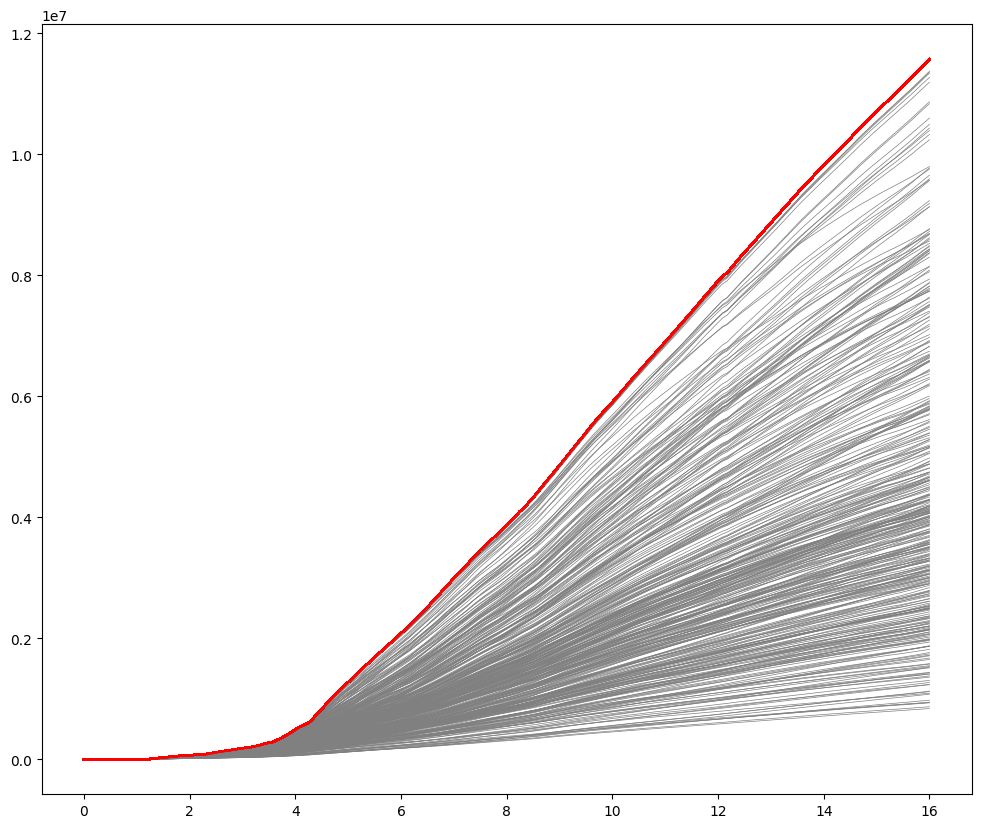

In [ ]:
plt.clf()
plt.figure(figsize=(12,10),dpi=100)
for i in range(len(time)):
    plt.plot(time[i],flpt[i], c = 'grey',linewidth = 0.5)
    plt.plot(time[i],flpth[i], c='red',linewidth = 0.7)

plt.show()

In [ ]:
differ = list()
for i in range(len(time)):
  differ.append((flpth[i][-1]-flpt[i][-1])/flpth[i][-1])

In [ ]:
target = list()
for i in differ:
  if i < 0.05:
    target.append(1)
  else:
    target.append(0)  

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Бинарный классификатор/управляющие параметры.xlsx')

In [ ]:
data.case = target

In [ ]:
data

,Fault_20,FWL,Corey_O_W,Corey_water,Krw_Sorw,gamma_poro,beta_poro,LN_gamma_perm,LN_beta_perm,LN_gamma_swcr,LN_beta_swl,cos_teta,LN_gamma_sw,LN_beta_sw,ANI,Azimuth,Major,Minior,Vertical,case
0,0.248669,-2668.120657,4.147217,3.177775,0.494511,0.079580,0.176747,0.186798,3.515292,1.128491,3.149606,0.366742,0.251390,-1.685805,0.068940,24.136461,5115.098062,1200,17.843120,0
1,0.797948,-2666.593854,4.670054,1.506022,0.593817,0.095913,0.184027,-0.191098,4.503237,1.002723,3.261260,0.866055,-0.347623,-1.792817,0.057273,23.641258,7953.472625,1200,10.278772,0
2,0.244519,-2661.809413,4.242004,1.009938,0.307953,0.088901,0.178225,-1.125245,4.917130,1.017008,3.197610,0.662352,-0.357731,-2.043908,0.029332,14.307662,2839.271040,1200,8.355897,0
3,0.100953,-2666.346174,4.086354,3.841536,0.341370,0.091875,0.198115,-1.179714,4.160925,1.064182,3.193909,0.403921,-0.138079,-1.884847,0.010684,40.923565,6774.469947,1200,19.568896,0
4,0.872963,-2658.616005,3.880740,0.840752,0.176003,0.077352,0.181099,-0.770162,4.268725,1.061205,3.133519,0.313545,-0.104302,-1.640589,0.025799,16.870123,6883.356932,1200,8.634161,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.589650,-2659.707385,4.357336,4.000000,0.445636,0.079210,0.182138,-0.177529,3.348000,1.070843,3.100000,0.275137,0.191001,-1.771365,0.089769,23.181524,4944.113930,1200,17.619898,0
396,0.283785,-2658.407888,3.960103,3.094919,0.517569,0.086829,0.172810,0.033920,3.348000,1.171147,3.106605,0.113358,0.258000,-1.703266,0.049129,44.328366,5300.252226,1200,7.792438,0
397,0.413280,-2667.873697,4.202236,3.506346,0.496193,0.083084,0.164000,-0.040189,3.749667,1.128224,3.153083,0.169930,0.258000,-1.684418,0.027232,28.280435,6583.312222,1200,12.780487,0
398,0.418474,-2654.126611,3.792400,2.926796,0.612489,0.091422,0.182782,-0.340220,3.864432,1.132623,3.221245,0.517358,0.258000,-1.707250,0.060504,27.600046,4633.631577,1200,17.351563,0


In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Бинарный классификатор/data.csv')